# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [107]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import balanced_accuracy_score,accuracy_score,average_precision_score
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix

## Regression Model Evaluation

In [31]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [22]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [68]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
type(y_pred_train)

numpy.ndarray

In [70]:
type(y_train)

pandas.core.frame.DataFrame

## 3. Calculate and print R-squared for both the training and the testing set.

In [24]:
r2_train = r2_score(y_train, y_pred_train)
r2_train

0.7306527988136723

In [25]:
r2_test = r2_score(y_test, y_pred_test)
r2_test

0.7810951022243224

## 4. Calculate and print mean squared error for both the training and the testing set.

In [26]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_train

23.057532243414904

In [28]:
mse_test = mean_squared_error(y_test, y_pred_test)
mse_test

17.289623055052502

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [32]:
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_train

3.2750657225702766

In [35]:
mae_test = mean_absolute_error(y_test, y_pred_test)
mae_test

3.254215984285963

## Classification Model Evaluation

In [36]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [83]:
clf = LogisticRegression(random_state=0).fit(X, y)

/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [86]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_train     

0.975

In [87]:
acc_test = accuracy_score(y_test, y_pred_test)
acc_test 

0.9666666666666667

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [88]:
bas_train = balanced_accuracy_score(y_train, y_pred_train)
bas_train

0.9750487329434697

In [89]:
bas_test = balanced_accuracy_score(y_test, y_pred_test) 
bas_test

0.9722222222222222

## 10. Calculate and print the precision score for both the training and the testing set.

In [93]:
prec_train = precision_score(y_train, y_pred_train, average='micro')
prec_train

0.975

In [94]:
prec_test = precision_score(y_test, y_pred_test, average="micro")
prec_test

0.9666666666666667

## 11. Calculate and print the recall score for both the training and the testing set.

In [98]:
rec_train = recall_score(y_train, y_pred_train, average ="micro")
rec_train

0.975

In [99]:
rec_test = recall_score(y_test, y_pred_test, average = "micro")
rec_test

0.9666666666666667

## 12. Calculate and print the F1 score for both the training and the testing set.

In [102]:
f1_train = f1_score(y_train, y_pred_train, average = "micro")
f1_train

0.975

In [103]:
f1_test = f1_score(y_test, y_pred_test, average = "micro")
f1_test

0.9666666666666667

## 13. Generate confusion matrices for both the training and the testing set.

In [106]:
conf_train = confusion_matrix(y_train, y_pred_train)
conf_train

array([[37,  0,  0],
       [ 0, 36,  2],
       [ 0,  1, 44]])

<AxesSubplot:>

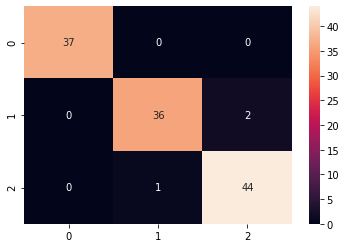

In [109]:
sns.heatmap(conf_train, annot=True)

In [110]:
conf_test = confusion_matrix(y_test, y_pred_test)
conf_test

array([[13,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  5]])

<AxesSubplot:>

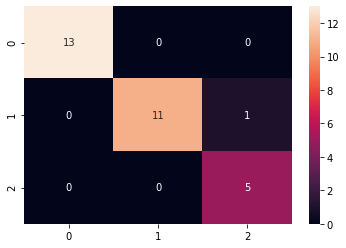

In [111]:
sns.heatmap(conf_test, annot=True)

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.